In [137]:
import pandas as pd

In [138]:
df=pd.read_csv('diabetes.csv')
df.head()

In [140]:
#split dataset

X=df.loc[:, df.columns != 'Outcome'] #features
y=df['Outcome'] #target

In [141]:
#split train and test data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=5)

In [147]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5,random_state=9) #First with max depth None and then with 5

"""
model=DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
"""

model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=9)

In [148]:
print('Feature Importances: ',model.feature_importances_)

Feature Importances:  [0.01486308 0.49228834 0.07202962 0.         0.         0.17313992
 0.07913372 0.16854531]


In [149]:
#perfromance test on train data

from sklearn.metrics import classification_report,confusion_matrix

y_train_pred=model.predict(X_train)

print(classification_report(y_train,y_train_pred))
print('--------------------------------------------------')
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       340
           1       0.85      0.62      0.72       197

    accuracy                           0.82       537
   macro avg       0.83      0.78      0.79       537
weighted avg       0.82      0.82      0.81       537

--------------------------------------------------
[[318  22]
 [ 75 122]]


In [150]:
#on test data
y_pred=model.predict(X_test)

print(classification_report(y_test,y_pred))
print('--------------------------------------------------')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       160
           1       0.68      0.54      0.60        71

    accuracy                           0.78       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.77      0.78      0.77       231

--------------------------------------------------
[[142  18]
 [ 33  38]]


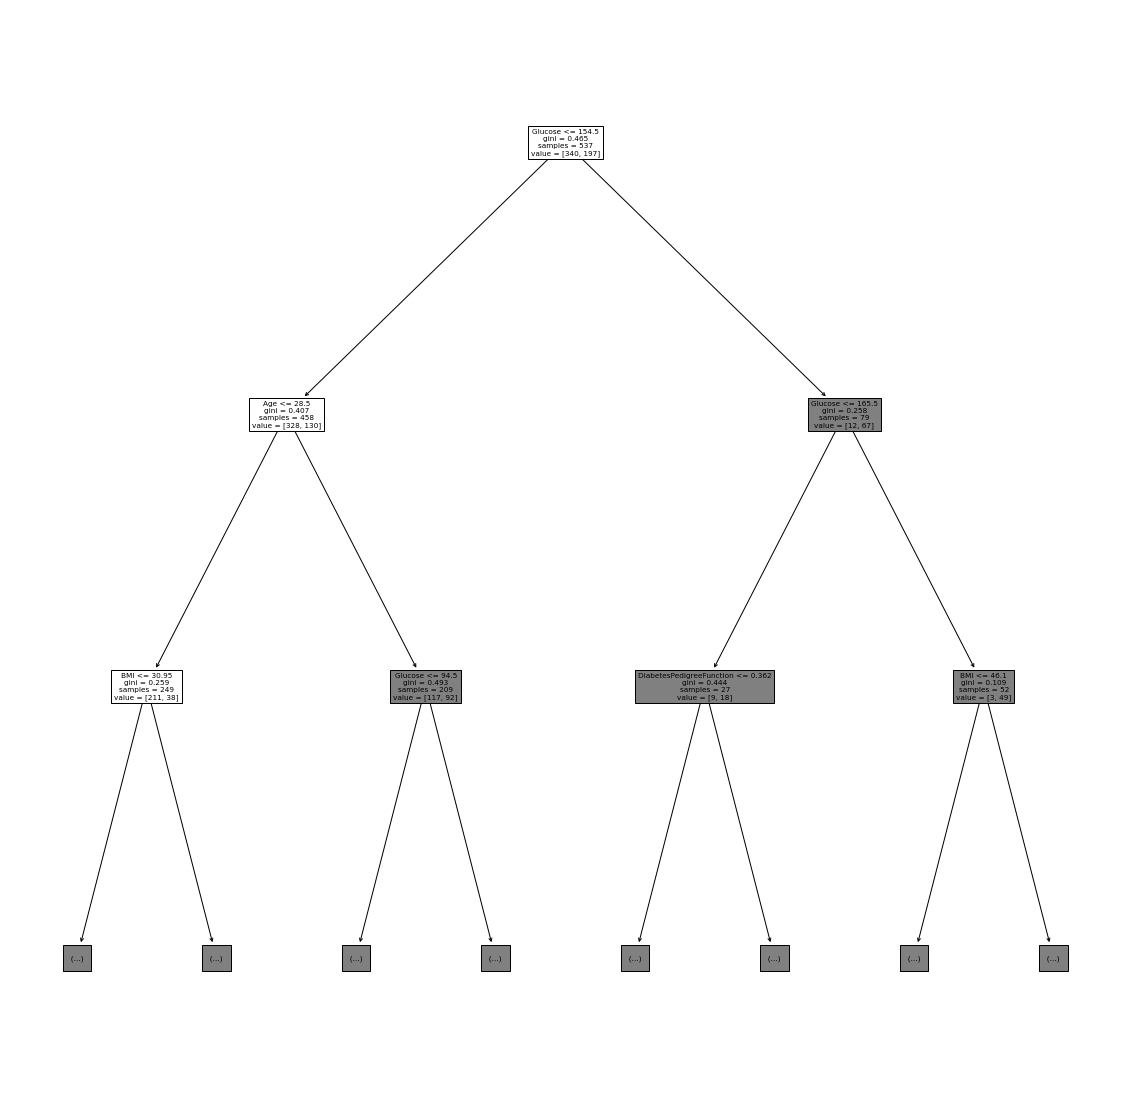

In [146]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
dt = plot_tree(model,max_depth=2,feature_names=X_train.columns)